In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn import datasets
from sklearn.metrics import accuracy_score

3. Perform SVM using the sklearn library for all the kernels and plot the barplot for the comparison results of all the kernels. Use wine dataset and diabetes dataset

In [2]:
df=datasets.load_wine()
x=df.data
y=df.target

In [3]:
data=pd.DataFrame(x,columns=df.feature_names)

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
data.shape

(178, 13)

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

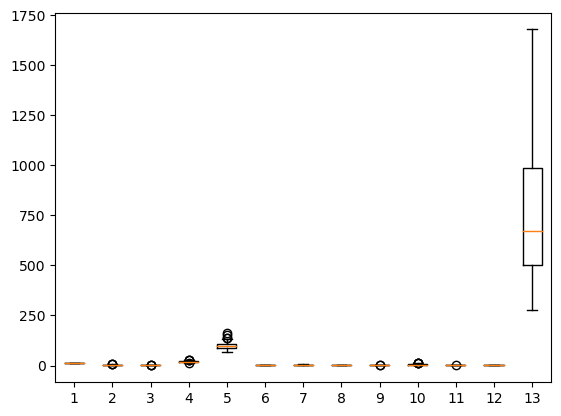

In [10]:
plt.boxplot(data)
plt.show()

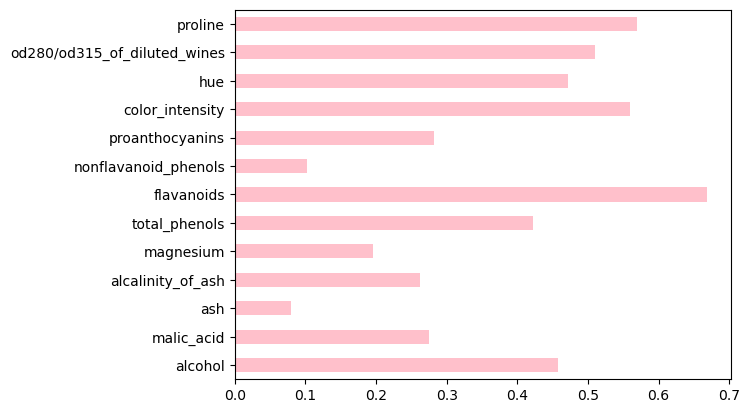

In [11]:
importance=mutual_info_classif(data,y)
feat=pd.Series(importance,data.columns)
feat.plot(kind='barh',color="pink")
plt.show()

In [12]:
new_data=data[["flavanoids","proline","color_intensity","hue","alcohol","od280/od315_of_diluted_wines"]]
xtrain, xtest, ytrain, ytest = train_test_split(new_data,y, test_size=0.33, random_state=42)

In [13]:
dx=SVC()
dx.fit(xtrain,ytrain)

SVC()

In [14]:
ypred=dx.predict(xtest)
print(accuracy_score(ytest,ypred))

0.711864406779661


In [15]:
def svm_kernels(data, target):
    xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.33, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracy = []
    for kernel in kernels:
        dx = SVC(kernel=kernel)
        dx.fit(xtrain, ytrain)
        ypreda = dx.predict(xtest)
        acc = accuracy_score(ytest, ypreda)
        accuracy.append(acc)
    return accuracy

accuracies = svm_kernels(new_data, y)

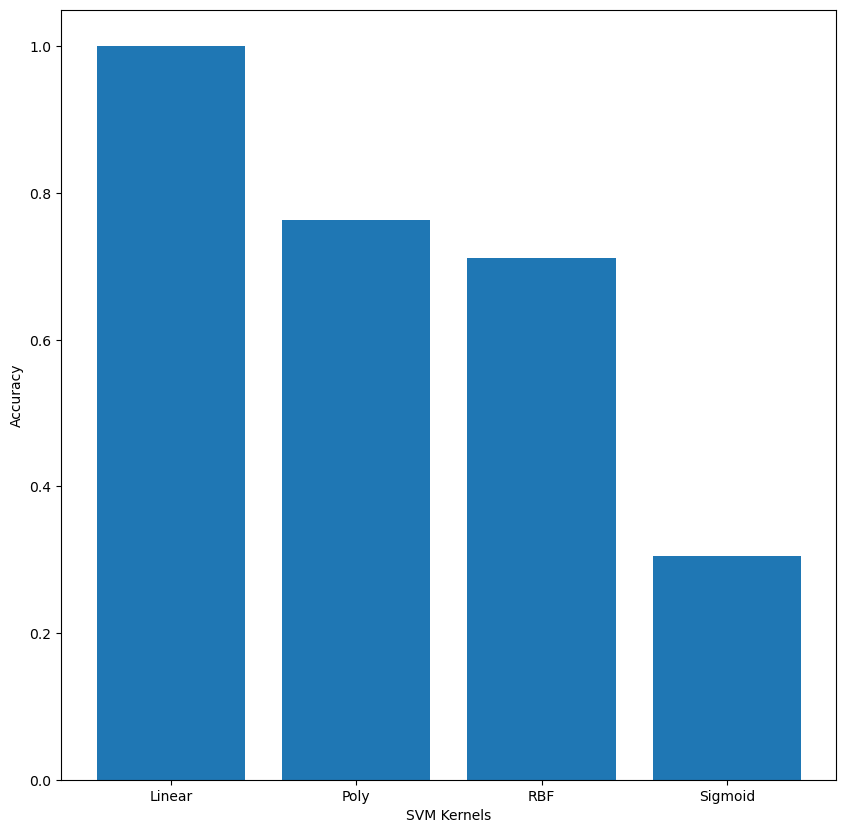

In [16]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(len(accuracies)), accuracies)
plt.xticks(np.arange(len(accuracies)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.show()

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [18]:
df=datasets.load_diabetes(scaled=False)
X=df.data
Y=df.target

In [19]:
data=pd.DataFrame(X,columns=df.feature_names)

In [20]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [22]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [23]:
data.duplicated().sum()

0

In [24]:
data['Target']=Y
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


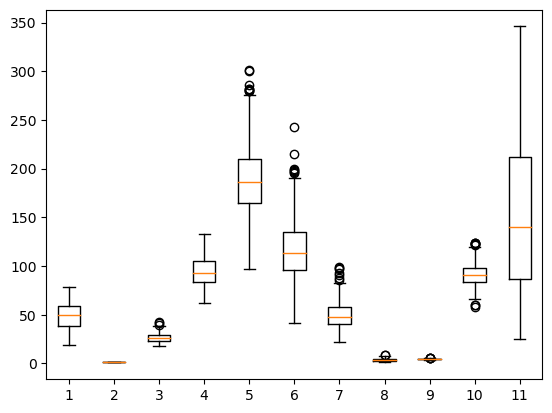

In [25]:
plt.boxplot(data)
plt.show()

In [26]:
# data.clip(data.quantile(0.2),data.quantile(0.8),inplace=True,axis=1)

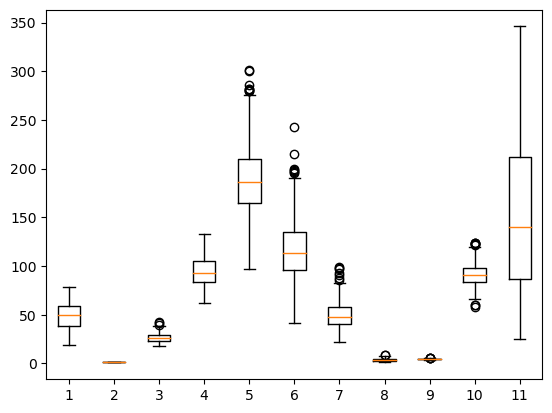

In [27]:
plt.boxplot(data)
plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

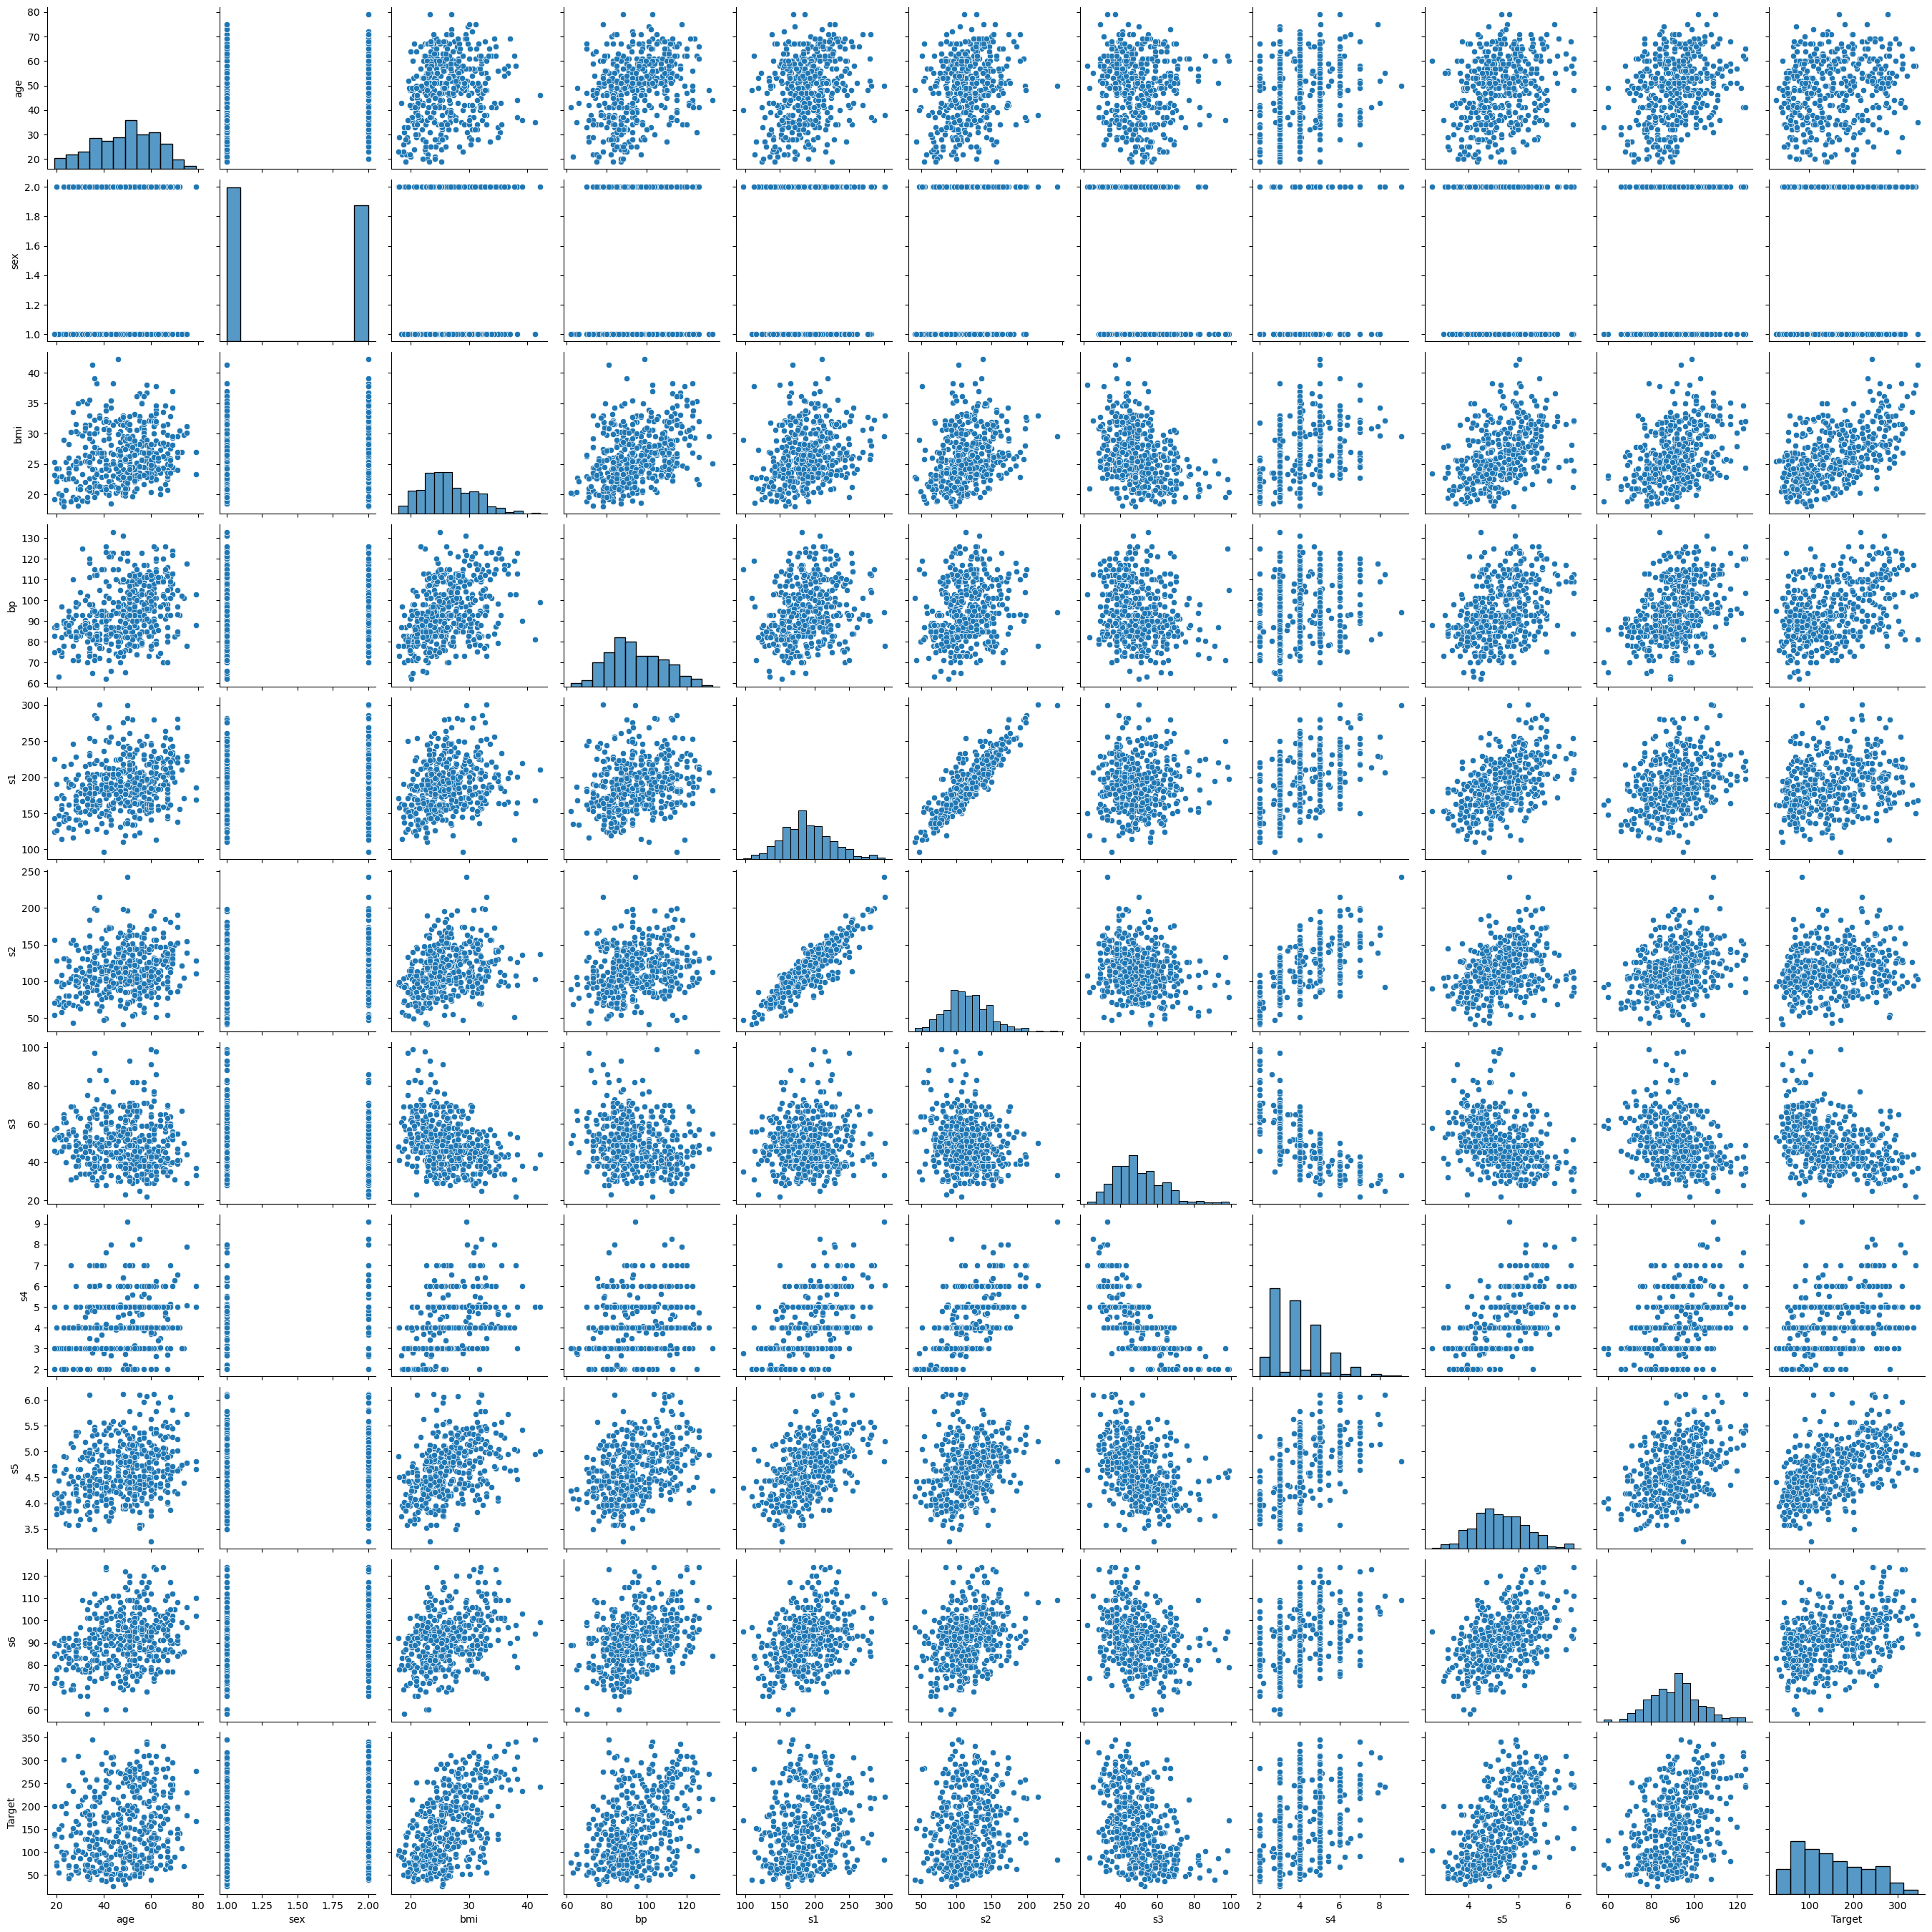

In [28]:
plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
dx=MinMaxScaler()
dx1=dx.fit_transform(data)
data=pd.DataFrame(dx1,columns=data.columns)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333,0.342679
...,...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303,0.476636
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667,0.246106
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606,0.333333
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091,0.607477


In [31]:
y=data['Target']
data=data.drop(['Target'],axis=1)

In [32]:
x=data

In [33]:
from sklearn.feature_selection import mutual_info_regression

<function matplotlib.pyplot.show(close=None, block=None)>

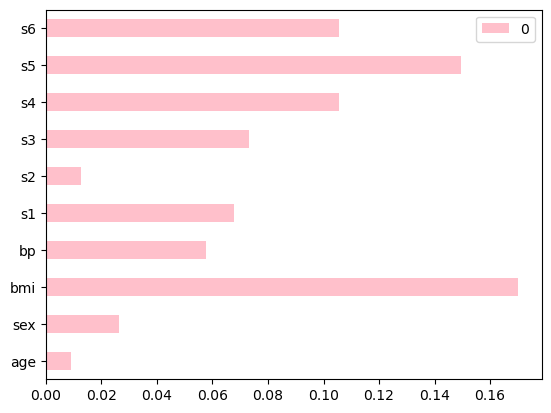

In [34]:
xd=mutual_info_regression(x,y,random_state=69)
xs=pd.DataFrame(xd,data.columns)
xs.plot(kind='barh',color='pink')
plt.show

In [35]:
from skfeature.function.similarity_based import fisher_score

<function matplotlib.pyplot.show(close=None, block=None)>

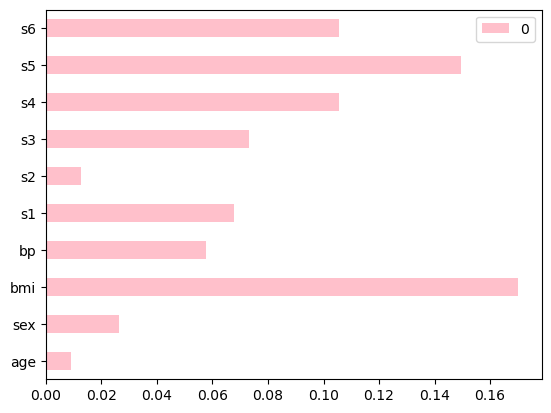

In [36]:
po = fisher_score.fisher_score(x.values, y.values)
op = pd.DataFrame(xd, data.columns)
op.plot(kind='barh', color='pink')
plt.show

In [37]:
data=data.drop(['sex','s1','s2'],axis=1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(data,y,random_state=42,test_size=0.3)

In [40]:
from sklearn.svm import SVR

In [41]:
dx=SVR()
dx.fit(xtrain,ytrain)

SVR()

In [42]:
from sklearn.metrics import r2_score

In [43]:
ypred=dx.predict(xtest)
r2_score(ytest,ypred)

0.4275054032147986

In [47]:
def svm_kernels(feat,target):
    xtrain, xtest, ytrain, ytest = train_test_split(feat,target, test_size=0.3, random_state=42)
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    accuracy=[]
    for i in kernels:
        svr=SVR(kernel=i)
        svr.fit(xtrain,ytrain)
        y_pred=svr.predict(xtest)
        acc=r2_score(ytest,y_pred)
        accuracy.append(acc)
        
    return accuracy     
accuracies=svm_kernels(data,y)   
print(accuracies)    

[0.46676976229310774, 0.37707361648794513, 0.4275054032147986, -51.78149663594922]


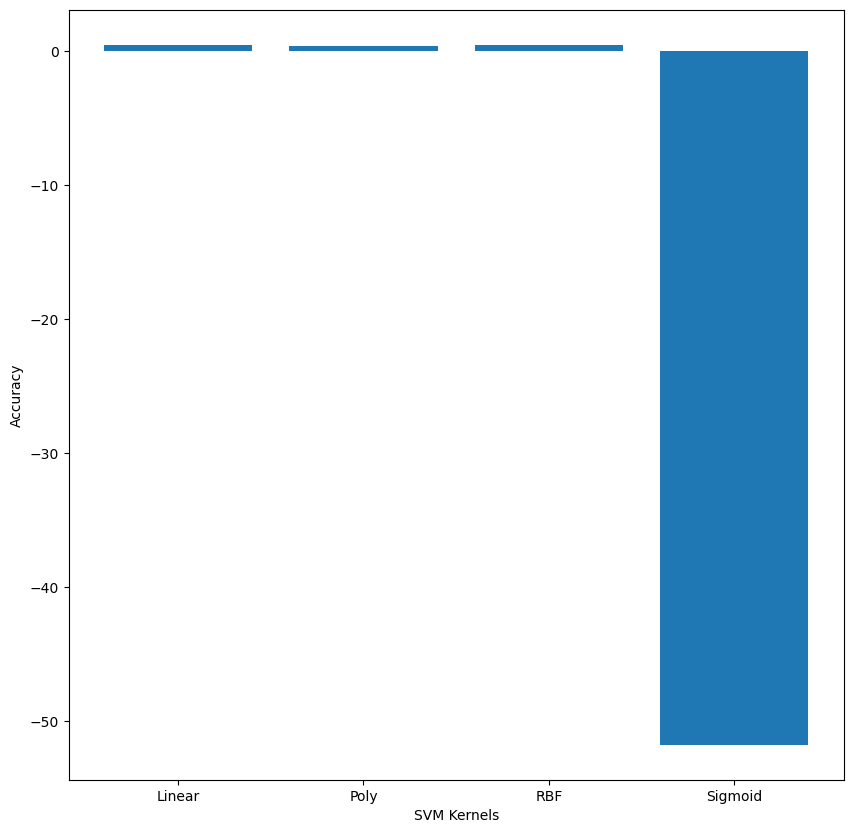

In [45]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(len(accuracies)), accuracies)
plt.xticks(np.arange(len(accuracies)), ['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.xlabel('SVM Kernels')
plt.ylabel('Accuracy')
plt.show()